# Let's get drunk!

## First things first, lets do some quick sanity checks to make sure this code does at least of alittle bit of what we would expect. 

### We can start out by testing a few limiting cases. First let's check to make sure that if both the sober game and the drunk are "Harmony" games, we get cooperation across the board. Let's update the Parameters.py file to have both of the perspectives represent the same game, and see what happens. 

#### Execute the cell below to write the games to file

In [16]:
%%writefile Parameters.py

import os

# Simulation Parameters
num_experiments =1 # The number of times the experiment should be run, for calculating ensemble averages
num_agents = 100 # The number of players involved
total_games = 5000 # The number of iterations

# Output Specifications
output_agents = False # If True, all the data for each agent will be output every (infreq_data) iterations
output_network = False # If True, the network data will be output every (infreq_data) iterations
draw_networks = False # If True, the network will be draw using networkx and saved as a png every (infreq_data) iterations
update_freq = 5		 # The number of iterations between individual strategy update events, only one player updates strategy ever update_freq time
infreq_data = 200 # The number of iterations between large data dumps
output_time_series = False # If true, Time series data on bulk variables will be printed (average alpha, average strategy, average beers etc)

'''Pay off Matrices '''
### (Pay off, Beer) ### 
# Beer effects alpha level, pay off does not. 
#############################
# 			|
# 	(A,W)	|   (B,X)
#___________|____________
# 			|
# 	(C,Y)	|	(D,Z)
# 			|
#############################
### Sober Game ###
(A_s, W_s) = (1.0,1.0)
(B_s, X_s) = (1.0,0.0)
(C_s, Y_s) = (0.0,0.0)
(D_s, Z_s) = (0.0,0.0)

### Drunk Game ###
(A_d, W_d) = (1.0,1.0)
(B_d, X_d) = (1.0,0.0)
(C_d, Y_d) = (0.0,0.0)
(D_d, Z_d) = (0.0,0.0)


### Rate Constants ###
kappa = 1.00 # Strength of beer
d = 0.010   # Metabolic rate of players

### Topology ###
'''The structure of the population '''
graph_type = 'None' #'Groups' #  # 'Random', 'BA'
edge_p = 0.1 # Probability of connection in a random graph, only useful if graph_type = 'Random'
barabasi_albert_m = 1 # Controls topology if graph_type = 'BA'
p_out = 0.1 # Initial probability of interacting outside your group, only useful if graph_type = 'Groups'
num_groups = 2 # Number of groups in population, only useful if graph_type = 'Groups'

### Initialization ##
pregame = True  # If True, the initial alpha level of players is picked randomly, if False, alpha = 0 for all players initially

'''These controls are still buggy. '''
specify_initial_conditions = False #If True, the user can specify initial condtions, if not, then IC are random
IC_x = 0.5
IC_alpha = 0.5

sigma_alpha = 0.1
sigma_x  = 0.1

######################################################################################################################
# Global Variables that program will modify ##########################################################################
######################################################################################################################
Drunks = [] 
Groups = []
Group_dict = {}
pos = None

r = max(W_s,X_s,Y_s, Z_s, W_d, X_d, Y_d, Z_d, 1.0)

if graph_type == 'BA':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_BA_%im_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, m, A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'Random':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Random_%.3fp_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, edge_p,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'None':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Well_mixed_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
elif graph_type == 'Groups':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Groups_%igroups_%.3fpout_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, num_groups, p_out,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
if not os.path.exists(dirname):
            os.makedirs(dirname)

Overwriting Parameters.py


### With the parameters set, we can run the main file, and (assuming its run for enough iterations) see the steady state solution

In [17]:
%run Main.py

Initialized...
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
Half way there...
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
Final data saved, run time:  10.7273631972


### Let's see what the hell that did
#### We can plot the initial and final distribution of strategies as follows

data/200Players_10000Games_1.00kappa_0.40d_Well_mixed_1.0As_-1.0Bs_1.0Cs_0.0Ds_2.0Ad_1.0Bd_1.0Cd_0.0Dd/


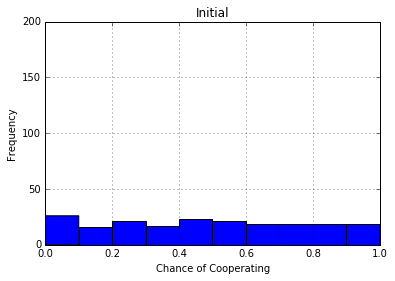

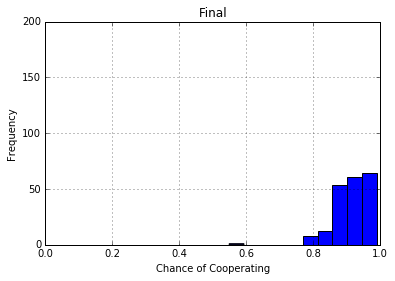

In [1]:
import pandas as pd
import numpy as np
import Parameters
import matplotlib.pylab as plt
%matplotlib inline
print Parameters.dirname
initial_name = '0_agent_data_0.csv' 
final_name = '0_agent_data_%i.csv' % Parameters.total_games
final_data = pd.read_csv(Parameters.dirname+final_name)
initial_data = pd.read_csv(Parameters.dirname+initial_name)

initial_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.ylabel('Frequency')
plt.xlabel('Chance of Cooperating')
plt.title("Initial")
plt.show()
final_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.title("Final")
plt.ylabel('Frequency')

plt.xlabel('Chance of Cooperating')
plt.show()

### And we can check to see how cooperation is correlated with alpha levels

c:\users\cole\appdata\local\enthought\canopy\user\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.995240211179, right=0.995240211179
  'left=%s, right=%s') % (left, right))


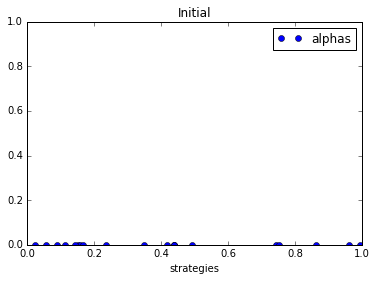

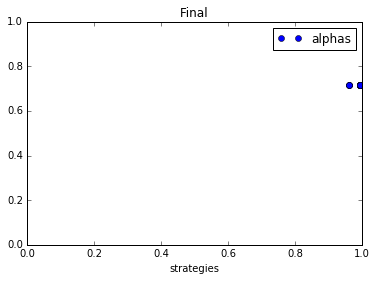

In [3]:
initial_data.plot(x= 'strategies', y = 'alphas', style = 'o')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("Initial")

final_data.plot(x= 'strategies', y = 'alphas', style = 'o')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title("Final")
plt.show()

## Great, now lets check another limit, lets set both games to PD and make sure we get some defection

In [20]:
%%writefile Parameters.py

import os

# Simulation Parameters
num_experiments =1 # The number of times the experiment should be run, for calculating ensemble averages
num_agents = 100 # The number of players involved
total_games = 5000 # The number of iterations

# Output Specifications
output_agents = False # If True, all the data for each agent will be output every (infreq_data) iterations
output_network = False # If True, the network data will be output every (infreq_data) iterations
draw_networks = False # If True, the network will be draw using networkx and saved as a png every (infreq_data) iterations
update_freq = 5		 # The number of iterations between individual strategy update events, only one player updates strategy ever update_freq time
infreq_data = 200 # The number of iterations between large data dumps
output_time_series = False # If true, Time series data on bulk variables will be printed (average alpha, average strategy, average beers etc)

'''Pay off Matrices '''
### (Pay off, Beer) ### 
# Beer effects alpha level, pay off does not. 
#############################
# 			|
# 	(A,W)	|   (B,X)
#___________|____________
# 			|
# 	(C,Y)	|	(D,Z)
# 			|
#############################
### Sober Game ###
(A_s, W_s) = (1.0,0.0)
(B_s, X_s) = (-1.0,0.0)
(C_s, Y_s) = (2.0,0.0)
(D_s, Z_s) = (0.0,1.0)

### Drunk Game ###
(A_d, W_d) = (1.0,0.0)
(B_d, X_d) = (-1.0,0.0)
(C_d, Y_d) = (2.0,0.0)
(D_d, Z_d) = (0.0,1.0)


### Rate Constants ###
kappa = 1.00 # Strength of beer
d = 0.010   # Metabolic rate of players

### Topology ###
'''The structure of the population '''
graph_type = 'None' #'Groups' #  # 'Random', 'BA'
edge_p = 0.1 # Probability of connection in a random graph, only useful if graph_type = 'Random'
barabasi_albert_m = 1 # Controls topology if graph_type = 'BA'
p_out = 0.1 # Initial probability of interacting outside your group, only useful if graph_type = 'Groups'
num_groups = 2 # Number of groups in population, only useful if graph_type = 'Groups'

### Initialization ##
pregame = True  # If True, the initial alpha level of players is picked randomly, if False, alpha = 0 for all players initially

'''These controls are still buggy. '''
specify_initial_conditions = False #If True, the user can specify initial condtions, if not, then IC are random
IC_x = 0.5
IC_alpha = 0.5

sigma_alpha = 0.1
sigma_x  = 0.1

######################################################################################################################
# Global Variables that program will modify ##########################################################################
######################################################################################################################
Drunks = [] 
Groups = []
Group_dict = {}
pos = None

r = max(W_s,X_s,Y_s, Z_s, W_d, X_d, Y_d, Z_d, 1.0)

if graph_type == 'BA':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_BA_%im_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, m, A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'Random':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Random_%.3fp_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, edge_p,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'None':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Well_mixed_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
elif graph_type == 'Groups':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Groups_%igroups_%.3fpout_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, num_groups, p_out,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
if not os.path.exists(dirname):
            os.makedirs(dirname)

Overwriting Parameters.py


In [21]:
%run Main.py

Initialized...
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
Half way there...
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
Final data saved, run time:  10.9832451202


data/100Players_5000Games_1.00kappa_0.01d_Well_mixed_1.0As_-1.0Bs_2.0Cs_0.0Ds_1.0Ad_-1.0Bd_2.0Cd_0.0Dd/


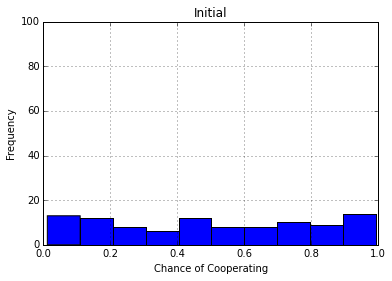

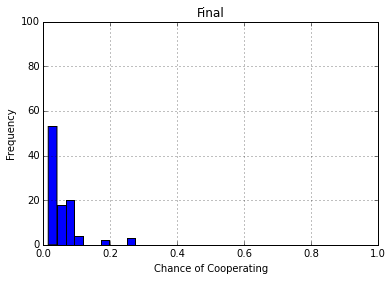

In [22]:
import pandas as pd
import numpy as np
import Parameters
import matplotlib.pylab as plt
%matplotlib inline
print Parameters.dirname
initial_name = '0_agent_data_0.csv' 
final_name = '0_agent_data_%i.csv' % Parameters.total_games
final_data = pd.read_csv(Parameters.dirname+final_name)
initial_data = pd.read_csv(Parameters.dirname+initial_name)

initial_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.ylabel('Frequency')
plt.xlabel('Chance of Cooperating')
plt.title("Initial")
plt.show()
final_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.title("Final")
plt.ylabel('Frequency')

plt.xlabel('Chance of Cooperating')
plt.show()

## Ok, since both of those are working, lets try something only DGT can do. I'll set the sober game up as a harmony game, while the drunk game will encourage defection. In both games, players will recieve beer aligned with the highest payoff. Assuming player's don't get drunk too fast, or sober up quickly (high d) they will converge to cooperation. If players get drunk quick and stay drunk (low d) they will converge to defection.

### Let's start with the high d case. We expect cooperation here.

In [27]:
%%writefile Parameters.py

import os

# Simulation Parameters
num_experiments =1 # The number of times the experiment should be run, for calculating ensemble averages
num_agents = 100 # The number of players involved
total_games = 5000 # The number of iterations

# Output Specifications
output_agents = False # If True, all the data for each agent will be output every (infreq_data) iterations
output_network = False # If True, the network data will be output every (infreq_data) iterations
draw_networks = False # If True, the network will be draw using networkx and saved as a png every (infreq_data) iterations
update_freq = 5		 # The number of iterations between individual strategy update events, only one player updates strategy ever update_freq time
infreq_data = 200 # The number of iterations between large data dumps
output_time_series = False # If true, Time series data on bulk variables will be printed (average alpha, average strategy, average beers etc)

'''Pay off Matrices '''
### (Pay off, Beer) ### 
# Beer effects alpha level, pay off does not. 
#############################
# 			|
# 	(A,W)	|   (B,X)
#___________|____________
# 			|
# 	(C,Y)	|	(D,Z)
# 			|
#############################
### Sober Game ###
(A_s, W_s) = (1.0,1.0)
(B_s, X_s) = (1.0,0.0)
(C_s, Y_s) = (0.0,0.0)
(D_s, Z_s) = (0.0,1.0)

### Drunk Game ###
(A_d, W_d) = (0.0,0.0)
(B_d, X_d) = (0.0,0.0)
(C_d, Y_d) = (1.0,0.0)
(D_d, Z_d) = (1.0,1.0)


### Rate Constants ###
kappa = 1.00 # Strength of beer
d = 1.0   # Metabolic rate of players

### Topology ###
'''The structure of the population '''
graph_type = 'None' #'Groups' #  # 'Random', 'BA'
edge_p = 0.1 # Probability of connection in a random graph, only useful if graph_type = 'Random'
barabasi_albert_m = 1 # Controls topology if graph_type = 'BA'
p_out = 0.1 # Initial probability of interacting outside your group, only useful if graph_type = 'Groups'
num_groups = 2 # Number of groups in population, only useful if graph_type = 'Groups'

### Initialization ##
pregame = True  # If True, the initial alpha level of players is picked randomly, if False, alpha = 0 for all players initially

'''These controls are still buggy. '''
specify_initial_conditions = False #If True, the user can specify initial condtions, if not, then IC are random
IC_x = 0.5
IC_alpha = 0.5

sigma_alpha = 0.1
sigma_x  = 0.1

######################################################################################################################
# Global Variables that program will modify ##########################################################################
######################################################################################################################
Drunks = [] 
Groups = []
Group_dict = {}
pos = None

r = max(W_s,X_s,Y_s, Z_s, W_d, X_d, Y_d, Z_d, 1.0)

if graph_type == 'BA':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_BA_%im_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, m, A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'Random':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Random_%.3fp_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, edge_p,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'None':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Well_mixed_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
elif graph_type == 'Groups':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Groups_%igroups_%.3fpout_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, num_groups, p_out,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
if not os.path.exists(dirname):
            os.makedirs(dirname)

Overwriting Parameters.py


In [28]:
%run Main.py

Initialized...
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
Half way there...
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
Final data saved, run time:  9.77392879782


data/100Players_5000Games_1.00kappa_1.00d_Well_mixed_1.0As_1.0Bs_0.0Cs_0.0Ds_0.0Ad_0.0Bd_1.0Cd_1.0Dd/


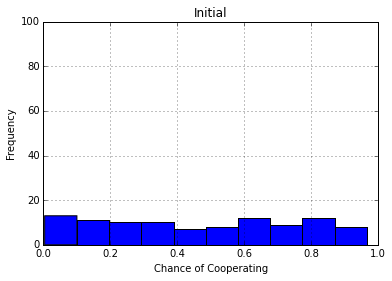

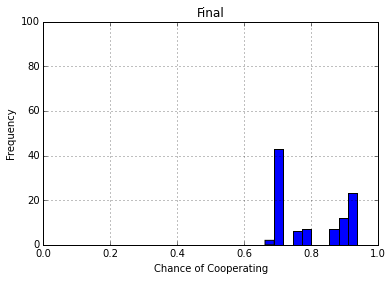

In [29]:
import pandas as pd
import numpy as np
import Parameters
import matplotlib.pylab as plt
%matplotlib inline
print Parameters.dirname
initial_name = '0_agent_data_0.csv' 
final_name = '0_agent_data_%i.csv' % Parameters.total_games
final_data = pd.read_csv(Parameters.dirname+final_name)
initial_data = pd.read_csv(Parameters.dirname+initial_name)

initial_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.ylabel('Frequency')
plt.xlabel('Chance of Cooperating')
plt.title("Initial")
plt.show()
final_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.title("Final")
plt.ylabel('Frequency')

plt.xlabel('Chance of Cooperating')
plt.show()

## Great, we get cooperation (mostly)! This happens because players sober up so quickly that the system never leaves the sober game. Inspite of the fact that their beer drinking occurs due to cooperation in the sober state, and in the drunk state defection leads to beer drinking (which encourages more defection). 

### Let's check the low d limit, in this case we expect to see defection take over. Despite the fact that the players are engaged in exactly the same games. 

In [31]:
%%writefile Parameters.py

import os

# Simulation Parameters
num_experiments =1 # The number of times the experiment should be run, for calculating ensemble averages
num_agents = 100 # The number of players involved
total_games = 5000 # The number of iterations

# Output Specifications
output_agents = False # If True, all the data for each agent will be output every (infreq_data) iterations
output_network = False # If True, the network data will be output every (infreq_data) iterations
draw_networks = False # If True, the network will be draw using networkx and saved as a png every (infreq_data) iterations
update_freq = 5		 # The number of iterations between individual strategy update events, only one player updates strategy ever update_freq time
infreq_data = 200 # The number of iterations between large data dumps
output_time_series = False # If true, Time series data on bulk variables will be printed (average alpha, average strategy, average beers etc)

'''Pay off Matrices '''
### (Pay off, Beer) ### 
# Beer effects alpha level, pay off does not. 
#############################
# 			|
# 	(A,W)	|   (B,X)
#___________|____________
# 			|
# 	(C,Y)	|	(D,Z)
# 			|
#############################
### Sober Game ###
(A_s, W_s) = (1.0,1.0)
(B_s, X_s) = (1.0,0.0)
(C_s, Y_s) = (0.0,0.0)
(D_s, Z_s) = (0.0,1.0)

### Drunk Game ###
(A_d, W_d) = (0.0,0.0)
(B_d, X_d) = (0.0,0.0)
(C_d, Y_d) = (1.0,0.0)
(D_d, Z_d) = (1.0,1.0)


### Rate Constants ###
kappa = 1.00 # Strength of beer
d = 0.010   # Metabolic rate of players

### Topology ###
'''The structure of the population '''
graph_type = 'None' #'Groups' #  # 'Random', 'BA'
edge_p = 0.1 # Probability of connection in a random graph, only useful if graph_type = 'Random'
barabasi_albert_m = 1 # Controls topology if graph_type = 'BA'
p_out = 0.1 # Initial probability of interacting outside your group, only useful if graph_type = 'Groups'
num_groups = 2 # Number of groups in population, only useful if graph_type = 'Groups'

### Initialization ##
pregame = True  # If True, the initial alpha level of players is picked randomly, if False, alpha = 0 for all players initially

'''These controls are still buggy. '''
specify_initial_conditions = False #If True, the user can specify initial condtions, if not, then IC are random
IC_x = 0.5
IC_alpha = 0.5

sigma_alpha = 0.1
sigma_x  = 0.1

######################################################################################################################
# Global Variables that program will modify ##########################################################################
######################################################################################################################
Drunks = [] 
Groups = []
Group_dict = {}
pos = None

r = max(W_s,X_s,Y_s, Z_s, W_d, X_d, Y_d, Z_d, 1.0)

if graph_type == 'BA':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_BA_%im_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, m, A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'Random':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Random_%.3fp_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, edge_p,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'None':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Well_mixed_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
elif graph_type == 'Groups':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Groups_%igroups_%.3fpout_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, num_groups, p_out,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
if not os.path.exists(dirname):
            os.makedirs(dirname)

Overwriting Parameters.py


In [32]:
%run Main.py

Initialized...
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
Half way there...
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
Final data saved, run time:  9.68930825924


data/100Players_5000Games_1.00kappa_0.01d_Well_mixed_1.0As_1.0Bs_0.0Cs_0.0Ds_0.0Ad_0.0Bd_1.0Cd_1.0Dd/


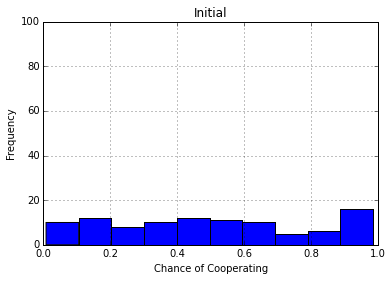

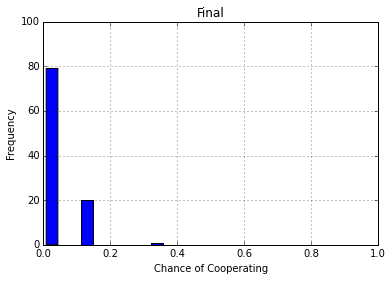

In [33]:
import pandas as pd
import numpy as np
import Parameters
import matplotlib.pylab as plt
%matplotlib inline
print Parameters.dirname
initial_name = '0_agent_data_0.csv' 
final_name = '0_agent_data_%i.csv' % Parameters.total_games
final_data = pd.read_csv(Parameters.dirname+final_name)
initial_data = pd.read_csv(Parameters.dirname+initial_name)

initial_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.ylabel('Frequency')
plt.xlabel('Chance of Cooperating')
plt.title("Initial")
plt.show()
final_data['strategies'].hist()
plt.xlim([0.0,1.0])
plt.ylim([0.0, Parameters.num_agents])
plt.title("Final")
plt.ylabel('Frequency')

plt.xlabel('Chance of Cooperating')
plt.show()

## In this case we see defection! This is because players don't sober up very quickly and defection leads to more beer drinking, and higher pay off in the drunk state.

## Okay, cool. So that was for a well-mixed population, but the implementation of the dynamics are exactly the same for the ER random networks and for the heterogenous networks. So we can check for interesting differences in those cases.

# Let's check out some group dynamics! 
### First we need to change the graph_type setting in the Parameters file to 'Groups'. Let's start with 2 groups (num_groups = 2), with a 10% probability of interacting outside your group (p_out = 0.1), and let's start with 20 players
### We will also want to change the pregame setting to False, which means that that all players will start with alpha = 0. (Turning 'pregame' to True randomizes alpha for the initial population). Let's set output_network = True , this will print a weighted edge_list as a .csv every 100 iterations (you can change the frequency of this by changing the infreq_data). The weights represent the probability of two players interacting.

In [63]:
%%writefile Parameters.py

import os

# Simulation Parameters
num_experiments =1 # The number of times the experiment should be run, for calculating ensemble averages
num_agents = 20 # The number of players involved
total_games = 1000 # The number of iterations

# Output Specifications
output_agents = False # If True, all the data for each agent will be output every (infreq_data) iterations
output_network = True # If True, the network data will be output every (infreq_data) iterations
draw_networks = False # If True, the network will be draw using networkx and saved as a png every (infreq_data) iterations
update_freq = 5		 # The number of iterations between individual strategy update events, only one player updates strategy ever update_freq time
infreq_data = 100 # The number of iterations between large data dumps
output_time_series = False # If true, Time series data on bulk variables will be printed (average alpha, average strategy, average beers etc)

'''Pay off Matrices '''
### (Pay off, Beer) ### 
# Beer effects alpha level, pay off does not. 
#############################
# 			|
# 	(A,W)	|   (B,X)
#___________|____________
# 			|
# 	(C,Y)	|	(D,Z)
# 			|
#############################
### Sober Game ###
(A_s, W_s) = (1.0,1.0)
(B_s, X_s) = (1.0,0.0)
(C_s, Y_s) = (0.0,0.0)
(D_s, Z_s) = (0.0,1.0)

### Drunk Game ###
(A_d, W_d) = (0.0,0.0)
(B_d, X_d) = (0.0,0.0)
(C_d, Y_d) = (1.0,0.0)
(D_d, Z_d) = (1.0,1.0)


### Rate Constants ###
kappa = 1.00 # Strength of beer
d = 0.400   # Metabolic rate of players

### Topology ###
'''The structure of the population '''
graph_type = 'Groups' #  # 'Random', 'BA'
edge_p = 0.1 # Probability of connection in a random graph, only useful if graph_type = 'Random'
barabasi_albert_m = 1 # Controls topology if graph_type = 'BA'
p_out = 0.1 # Initial probability of interacting outside your group, only useful if graph_type = 'Groups'
num_groups = 2 # Number of groups in population, only useful if graph_type = 'Groups'

### Initialization ##
pregame = False  # If True, the initial alpha level of players is picked randomly, if False, alpha = 0 for all players initially

'''These controls are still buggy. '''
specify_initial_conditions = False #If True, the user can specify initial condtions, if not, then IC are random
IC_x = 0.5
IC_alpha = 0.5

sigma_alpha = 0.1
sigma_x  = 0.1

######################################################################################################################
# Global Variables that program will modify ##########################################################################
######################################################################################################################
Drunks = [] 
Groups = []
Group_dict = {}
pos = None

r = max(W_s,X_s,Y_s, Z_s, W_d, X_d, Y_d, Z_d, 1.0)

if graph_type == 'BA':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_BA_%im_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, m, A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'Random':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Random_%.3fp_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, edge_p,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)

elif graph_type == 'None':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Well_mixed_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
elif graph_type == 'Groups':
	dirname = 'data/%iPlayers_%iGames_%.2fkappa_%.2fd_Groups_%igroups_%.3fpout_%.1fAs_%.1fBs_%.1fCs_%.1fDs_%.1fAd_%.1fBd_%.1fCd_%.1fDd/' %( num_agents, total_games, kappa, d, num_groups, p_out,  A_s, B_s, C_s, D_s, A_d, B_d, C_d, D_d)
	
if not os.path.exists(dirname):
            os.makedirs(dirname)

Overwriting Parameters.py


In [66]:
%run Main.py

Initialized...
0
100
200
300
400
Half way there...
500
600
700
800
900
Final data saved, run time:  0.392046779496


## We can watch the network evolve by plotting the graphs and weighting the edges. The files are just .csv so you can use any visualization you like but here's one I made. The graphs start out with the two groups clearly seperated, and a low probability of interacting amongest each other. However as the night unfolds interactions between groups becomes much more likely

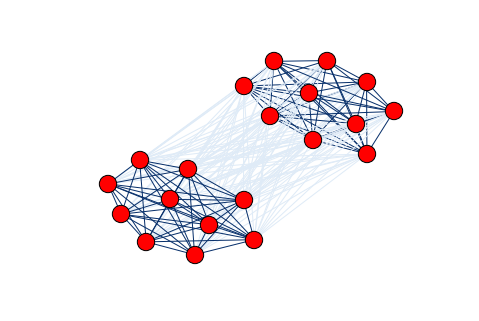

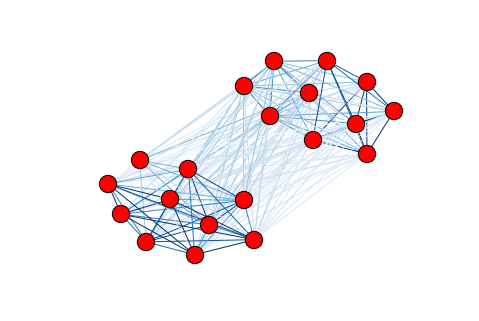

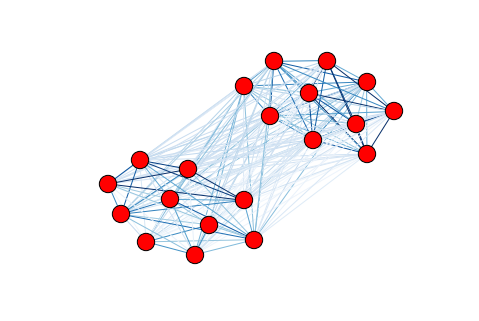

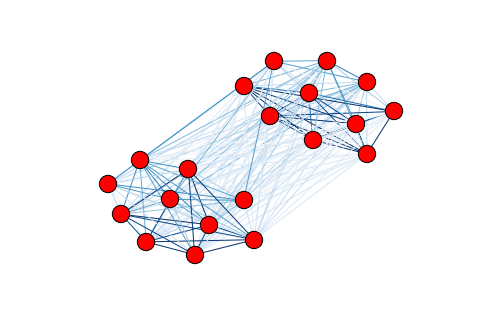

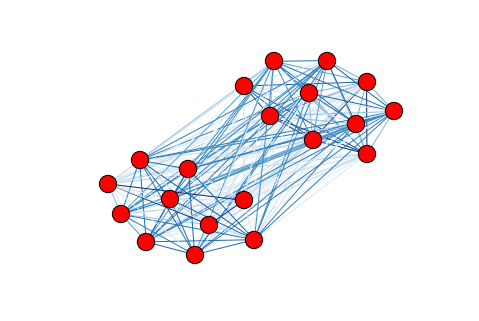

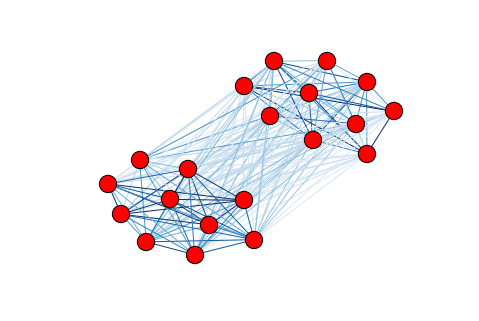

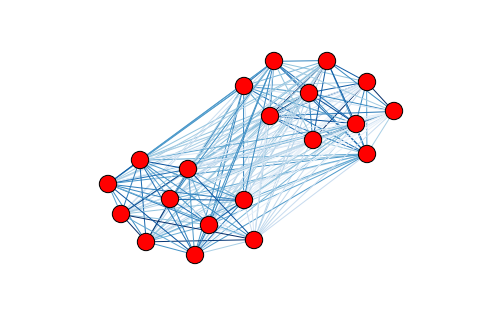

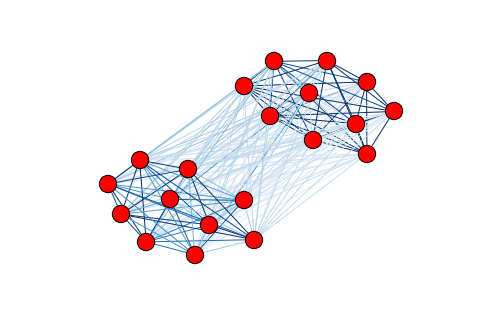

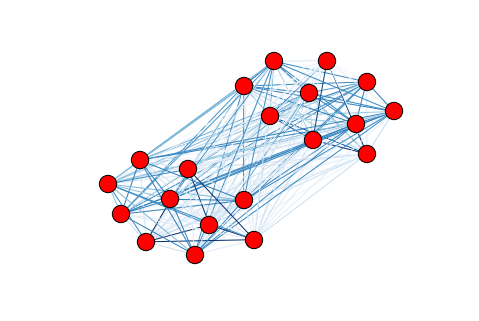

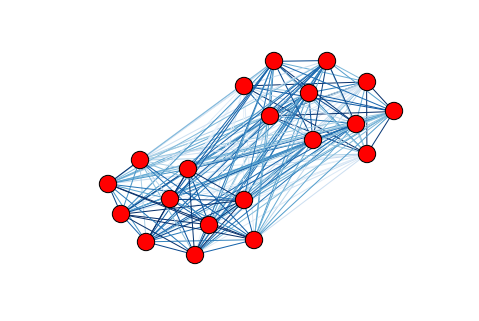

In [67]:
%matplotlib inline
import Output
from Parameters import total_games, infreq_data
Output.show_networks(0, total_games, infreq_data)